<a href="https://colab.research.google.com/github/ayudixit/ML_Training/blob/main/K_means_clustering_%26_Hierarchical_Clustering_Dendrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

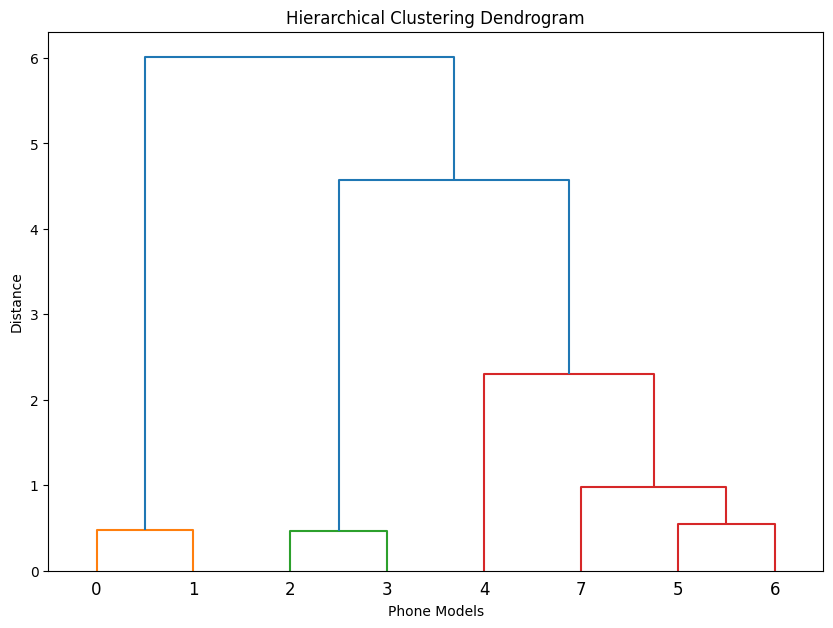

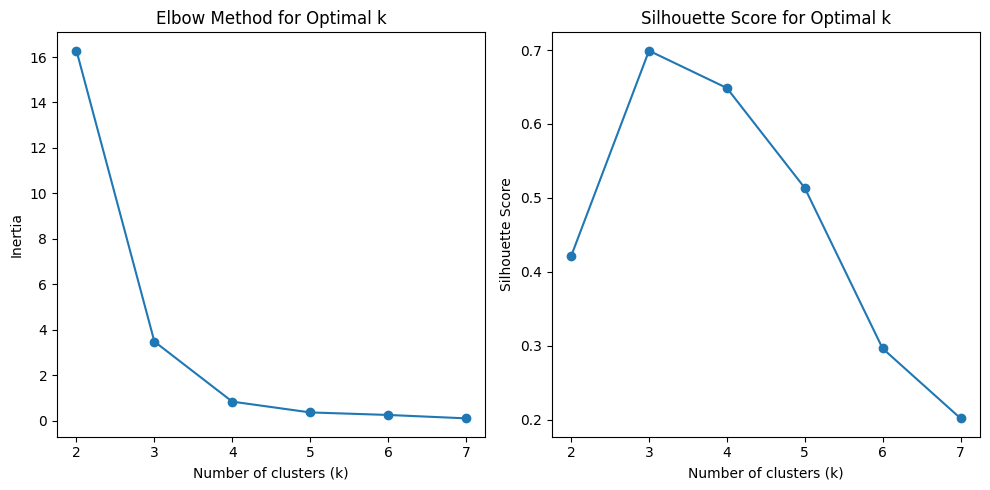

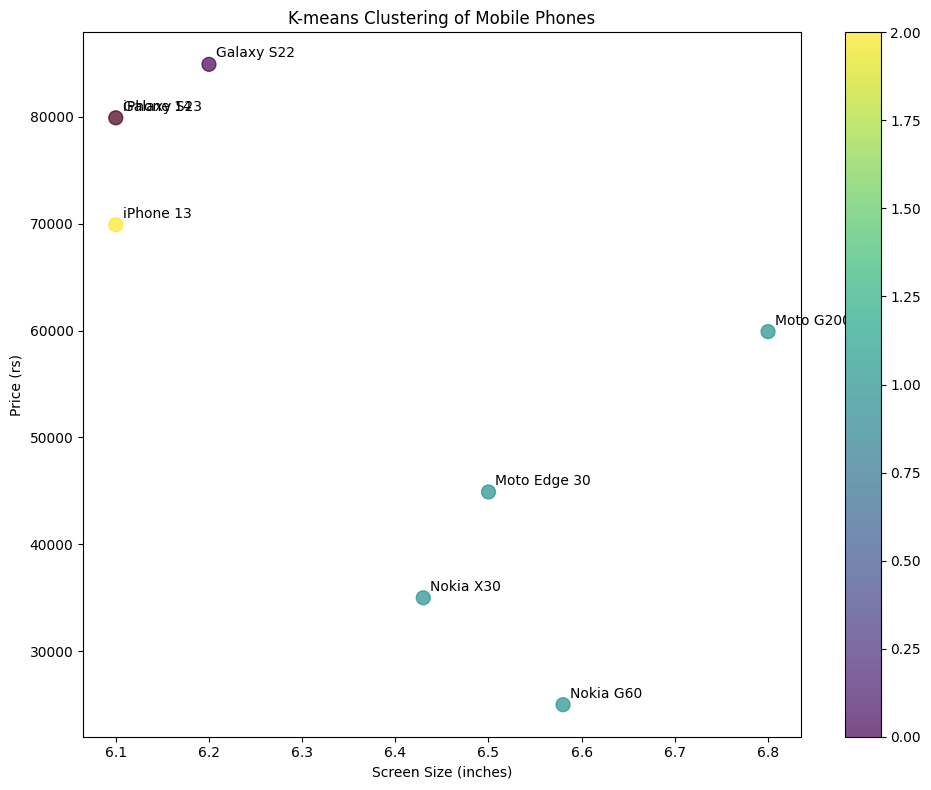

      Brand         Model  Screen Size (inches)  Resolution Width  \
0     Apple     iPhone 14                  6.10              2532   
1     Apple     iPhone 13                  6.10              2532   
2   Samsung    Galaxy S23                  6.10              2340   
3   Samsung    Galaxy S22                  6.20              2340   
4  Motorola     Moto G200                  6.80              2460   
5  Motorola  Moto Edge 30                  6.50              2400   
6     Nokia     Nokia X30                  6.43              2400   
7     Nokia     Nokia G60                  6.58              2400   

   Resolution Height  Price (rs)  Hierarchical Cluster  KMeans Cluster  
0               1170       79900                     0               2  
1               1170       69900                     0               2  
2               1080       79900                     0               0  
3               1080       84900                     0               0  
4            

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

# Step 1: Load the mobile display data
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (rs)': [79900, 69900, 79900, 84900, 59900, 44900, 35000, 25000]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (rs)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Apply Agglomerative Hierarchical Clustering
agglomerative_clustering = AgglomerativeClustering(distance_threshold=50, linkage='ward', n_clusters=None)
df['Hierarchical Cluster'] = agglomerative_clustering.fit_predict(scaled_features)

# Step 6: Visualize the dendrogram to understand the clustering hierarchy
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Phone Models')
plt.ylabel('Distance')
plt.show()

# Step 7: K-means clustering - Elbow method to find optimal number of clusters
inertias = []
silhouette_scores = []
max_clusters = 7  # Since we have 8 data points, we'll test up to 7 clusters

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters (let's say it's 3 based on the elbow curve and silhouette score)
optimal_k = 3

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize K-means clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Screen Size (inches)'], df['Price (rs)'],
                      c=df['KMeans Cluster'], cmap='viridis',
                      s=100, alpha=0.7)
plt.colorbar(scatter)
plt.title('K-means Clustering of Mobile Phones')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (rs)')

for i, txt in enumerate(df['Model']):
    plt.annotate(txt, (df['Screen Size (inches)'][i], df['Price (rs)'][i]),
                 xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Display the DataFrame with cluster labels
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (rs)', 'Hierarchical Cluster', 'KMeans Cluster']])